모듈 로딩 <hr>

In [441]:
# 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import datetime as dt
import seaborn as sns
import utils_copy2


In [442]:
F_PATH = r'C:\Users\KDP38\Desktop\KDT7\z_2nd_project\MALGUN.TTF'
utils_copy2.setHangulFont(F_PATH)

Malgun Gothic 폰트 설정


데이터 준비 <hr>

In [443]:
# 김포공항 출발 데이터 준비
data_dir = './airport_departure'

In [444]:
# 날짜와 시간별 항공기 지연 현황 엑셀 파일 한꺼번에 불러오기
if os.path.exists(data_dir):
    excel_files=[file for file in os.listdir(data_dir) if file.endswith('.xlsx')]
    
    df_list=[]
    for file in excel_files:
        file_path=os.path.join(data_dir,file)
        df=pd.read_excel(file_path)
        df_list.append(df)
    
    GIMPO_departure=pd.concat(df_list, ignore_index=True)
    
    print(GIMPO_departure.head())
    
    GIMPO_departure.to_csv('GIMPO_departure_12month.csv', index=False)

c:\Users\KDP38\anaconda3\envs\PY39\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


  출/도착구분        날짜     항공사      편명 출발공항코드 출발공항명 도착공항코드 도착공항명   계획시간   예상시간  \
0     출발  20240101  아시아나항공  OZ8901    GMP    김포    CJU    제주  06:00  06:00   
1     출발  20240101     진에어   LJ501    GMP    김포    CJU    제주  06:05  06:05   
2     출발  20240101   이스타항공   ZE201    GMP    김포    CJU    제주  06:20  06:25   
3     출발  20240101  아시아나항공  OZ8905    GMP    김포    CJU    제주  06:20  06:20   
4     출발  20240101    제주항공   7C101    GMP    김포    CJU    제주  06:30  06:30   

    출발시간  구분  현황  
0  06:24  여객  출발  
1  06:19  여객  출발  
2  06:47  여객  지연  
3  06:38  여객  출발  
4  06:42  여객  출발  


In [445]:
# 김포공항 출발 정보 확인
GIMPO_departure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65523 entries, 0 to 65522
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   출/도착구분  65523 non-null  object
 1   날짜      65523 non-null  int64 
 2   항공사     65507 non-null  object
 3   편명      65523 non-null  object
 4   출발공항코드  65523 non-null  object
 5   출발공항명   65523 non-null  object
 6   도착공항코드  65523 non-null  object
 7   도착공항명   65522 non-null  object
 8   계획시간    65523 non-null  object
 9   예상시간    65523 non-null  object
 10  출발시간    65523 non-null  object
 11  구분      65523 non-null  object
 12  현황      64929 non-null  object
dtypes: int64(1), object(12)
memory usage: 6.5+ MB


In [446]:
# 현황별 갯수
GIMPO_departure['현황'].value_counts(dropna = False)
GIMPO_departure['현황'].value_counts(dropna = False)

현황
출발     51121
지연     13364
NaN      594
취소       411
회항        33
Name: count, dtype: int64

In [447]:
# 날씨 데이터 준비
weather = '../z_2nd_project/날씨데이터.xlsx'
weather_data = pd.read_excel(weather)
WeatherDF = pd.DataFrame(weather_data)# 현황별 갯수
GIMPO_departure['현황'].value_counts(dropna = False)

# 결측치 확인
WeatherDF.isna().sum()
WeatherDF.info()

# 강수량의 결측치를 0으로 바꾸기
WeatherDF['강수량(mm)'] = WeatherDF['강수량(mm)'].fillna(0.)
WeatherDF.head()

WeatherDF.to_csv('GIMPO_airport_data', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8781 entries, 0 to 8780
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   지점          8781 non-null   int64         
 1   지점명         8781 non-null   object        
 2   일시          8781 non-null   datetime64[ns]
 3   풍향(deg)     8781 non-null   int64         
 4   풍속(KT)      8781 non-null   int64         
 5   순간풍속(KT)    67 non-null     float64       
 6   시정(m)       8781 non-null   int64         
 7   일기현상        2702 non-null   float64       
 8   전운량(1/8)    8781 non-null   int64         
 9   1층 운량(1/8)  6075 non-null   float64       
 10  2층 운량(1/8)  2695 non-null   float64       
 11  3층 운량(1/8)  811 non-null    float64       
 12  4층 운량(1/8)  2 non-null      float64       
 13  1층 운형       6075 non-null   float64       
 14  2층 운형       2695 non-null   float64       
 15  3층 운형       811 non-null    float64       
 16  4층 운형       2 non-null  

전처리 <hr>

[ 날짜와 일시 object 타입으로 변환 ]

In [448]:
# '일시'를 분리하기 위해 'datetime'타입으로 만들기
WeatherDF['일시'] = pd.to_datetime(weather_data['일시'])

In [449]:
# 날짜와 일시를 'object'타입으로 변환, 시간 데이터를 김포공항의 계획시간과 맞추기 위해 열 이름 통일
WeatherDF['날짜'] = WeatherDF['일시'].dt.strftime('%Y-%m-%d') 
WeatherDF['시간'] = WeatherDF['일시'].dt.strftime('%H:%M:%S')

In [450]:
# 혼선을 방지하기 위해 '일시'열 삭제
WeatherDF = WeatherDF.drop(columns=['일시'])

In [451]:
# 기상청 데이터의 '날짜(int)' --> object
GIMPO_departure['날짜'] = GIMPO_departure['날짜'].astype(object)

# 날짜와 시간이 'object'타입으로 변환됐는지 확인
print(GIMPO_departure.info())
WeatherDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65523 entries, 0 to 65522
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   출/도착구분  65523 non-null  object
 1   날짜      65523 non-null  object
 2   항공사     65507 non-null  object
 3   편명      65523 non-null  object
 4   출발공항코드  65523 non-null  object
 5   출발공항명   65523 non-null  object
 6   도착공항코드  65523 non-null  object
 7   도착공항명   65522 non-null  object
 8   계획시간    65523 non-null  object
 9   예상시간    65523 non-null  object
 10  출발시간    65523 non-null  object
 11  구분      65523 non-null  object
 12  현황      64929 non-null  object
dtypes: object(13)
memory usage: 6.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8781 entries, 0 to 8780
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지점          8781 non-null   int64  
 1   지점명         8781 non-null   object 
 2   풍향(deg)     8781 non-null   i

In [452]:
# 기상청 데이터의 '날짜'와 '시간' 형식과 같게 항공데이터의 '날짜'형식 변환
GIMPO_departure['날짜'] = GIMPO_departure['날짜'].astype(str).str[:4] + '-' + \
                           GIMPO_departure['날짜'].astype(str).str[4:6] + '-' + \
                           GIMPO_departure['날짜'].astype(str).str[6:]
WeatherDF['시간'] = WeatherDF['시간'].str[:5]
GIMPO_departure.head()
WeatherDF.head()


,지점,지점명,풍향(deg),풍속(KT),순간풍속(KT),시정(m),일기현상,전운량(1/8),1층 운량(1/8),2층 운량(1/8),...,2층 운고(FT),3층 운고(FT),4층 운고(FT),기온(°C),이슬점온도(°C),해면기압(hPa),현지기압(hPa),강수량(mm),날짜,시간
0,110,김포공항,280,2,NaN,1500,41.0,0,NaN,NaN,...,NaN,NaN,NaN,-4.2,-4.4,1027.4,1025.1,0.0,2024-01-01,01:00
1,110,김포공항,40,1,NaN,1200,41.0,0,NaN,NaN,...,NaN,NaN,NaN,-3.2,-3.3,1027.9,1025.6,0.0,2024-01-01,02:00
2,110,김포공항,310,3,NaN,500,46.0,1,1.0,NaN,...,NaN,NaN,NaN,-4.1,-4.4,1028.4,1026.1,0.0,2024-01-01,03:00
3,110,김포공항,340,3,NaN,300,46.0,4,4.0,NaN,...,NaN,NaN,NaN,-2.3,-2.6,1028.6,1026.3,0.0,2024-01-01,04:00
4,110,김포공항,270,1,NaN,400,42.0,4,4.0,NaN,...,NaN,NaN,NaN,-1.9,-2.0,1028.8,1026.5,0.0,2024-01-01,05:00


[ 필요한 데이터만 추출 ] <hr>

In [453]:
# 이륙 정보 중에서 불필요한 데이터 삭제
DepartureDF = GIMPO_departure.drop(['항공사', '편명', '출발공항코드', '출발공항명', '도착공항코드', '예상시간', '도착공항명', '구분'], axis = 1)
DepartureDF.head(7)

,출/도착구분,날짜,계획시간,출발시간,현황
0,출발,2024-01-01,06:00,06:24,출발
1,출발,2024-01-01,06:05,06:19,출발
2,출발,2024-01-01,06:20,06:47,지연
3,출발,2024-01-01,06:20,06:38,출발
4,출발,2024-01-01,06:30,06:42,출발
5,출발,2024-01-01,06:40,07:04,출발
6,출발,2024-01-01,06:40,07:11,지연


In [454]:
# 날씨정보 중에서 필요한 데이터만 추출
WeatherDF = WeatherDF[['지점명', '풍속(KT)', '기온(°C)', '시정(m)', '현지기압(hPa)', '강수량(mm)', '날짜', '시간']]
WeatherDF.head(7)

,지점명,풍속(KT),기온(°C),시정(m),현지기압(hPa),강수량(mm),날짜,시간
0,김포공항,2,-4.2,1500,1025.1,0.0,2024-01-01,01:00
1,김포공항,1,-3.2,1200,1025.6,0.0,2024-01-01,02:00
2,김포공항,3,-4.1,500,1026.1,0.0,2024-01-01,03:00
3,김포공항,3,-2.3,300,1026.3,0.0,2024-01-01,04:00
4,김포공항,1,-1.9,400,1026.5,0.0,2024-01-01,05:00
5,김포공항,1,-1.7,700,1026.5,0.0,2024-01-01,06:00
6,김포공항,2,-2.4,700,1027.1,0.0,2024-01-01,07:00


In [455]:
# '날짜'와 '시간' 기준으로 병합하기 위해 형태 통일
DepartureDF['계획시간2'] = DepartureDF['계획시간'].str[:2] + ':00'
DepartureDF.head()

,출/도착구분,날짜,계획시간,출발시간,현황,계획시간2
0,출발,2024-01-01,06:00,06:24,출발,06:00
1,출발,2024-01-01,06:05,06:19,출발,06:00
2,출발,2024-01-01,06:20,06:47,지연,06:00
3,출발,2024-01-01,06:20,06:38,출발,06:00
4,출발,2024-01-01,06:30,06:42,출발,06:00


In [456]:
# '날짜', '시간' 기준으로 데이터프레임 병합
merged_DF = pd.merge(DepartureDF, WeatherDF, left_on=['날짜', '계획시간2'], right_on=['날짜', '시간'], how='inner')

# 병합을 위해 임의로 만든 계획시간2 삭제
merged_DF.drop(columns=['계획시간2'], inplace=True)
merged_DF.head()


,출/도착구분,날짜,계획시간,출발시간,현황,지점명,풍속(KT),기온(°C),시정(m),현지기압(hPa),강수량(mm),시간
0,출발,2024-01-01,06:00,06:24,출발,김포공항,1,-1.7,700,1026.5,0.0,06:00
1,출발,2024-01-01,06:05,06:19,출발,김포공항,1,-1.7,700,1026.5,0.0,06:00
2,출발,2024-01-01,06:20,06:47,지연,김포공항,1,-1.7,700,1026.5,0.0,06:00
3,출발,2024-01-01,06:20,06:38,출발,김포공항,1,-1.7,700,1026.5,0.0,06:00
4,출발,2024-01-01,06:30,06:42,출발,김포공항,1,-1.7,700,1026.5,0.0,06:00


[ '지연'과 '출발'인 경우만 추출] <hr>

In [457]:
# '지연'인 경우만 추출 
depart_delay = merged_DF.loc[merged_DF['현황'] == '지연']

# '출발'인 경우만 추출
depart_intime = merged_DF.loc[merged_DF['현황'] == '출발']

cancel = merged_DF.loc[merged_DF['현황'] == '취소']

depart_delay.head()

,출/도착구분,날짜,계획시간,출발시간,현황,지점명,풍속(KT),기온(°C),시정(m),현지기압(hPa),강수량(mm),시간
2,출발,2024-01-01,06:20,06:47,지연,김포공항,1,-1.7,700,1026.5,0.0,06:00
6,출발,2024-01-01,06:40,07:11,지연,김포공항,1,-1.7,700,1026.5,0.0,06:00
16,출발,2024-01-01,07:05,07:31,지연,김포공항,2,-2.4,700,1027.1,0.0,07:00
17,출발,2024-01-01,07:10,07:39,지연,김포공항,2,-2.4,700,1027.1,0.0,07:00
39,출발,2024-01-01,08:50,09:47,지연,김포공항,1,-2.6,700,1027.4,0.0,08:00


각 기상상황별 지연 횟수 그래프 <hr>

[ 시간대별 지연 횟수 ]

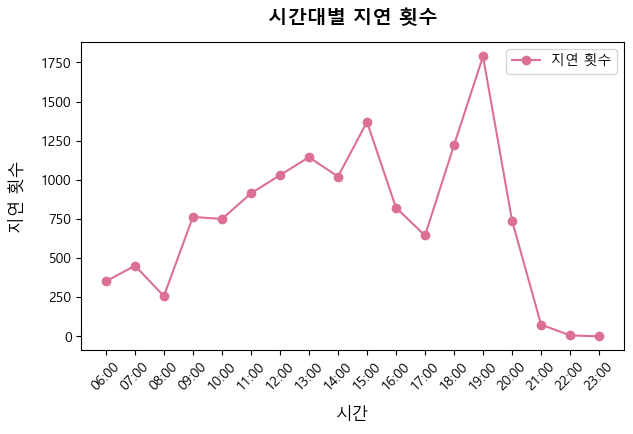

In [458]:
# 시간대 별 지연 횟수 추출
time_delay_counts = depart_delay['시간'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(7, 4))
plt.plot(time_delay_counts.index, time_delay_counts.values, marker = 'o', linestyle = '-', color = 'palevioletred', label = '지연 횟수')

# 그래프 제목 및 축 라벨 설정
plt.title('시간대별 지연 횟수', fontweight = 'bold', fontsize = 14, pad = 13)
plt.xlabel('시간', fontsize = 12, labelpad = 10)
plt.ylabel('지연 횟수', fontsize = 12, labelpad = 10)
plt.xticks(rotation = 45)
plt.legend()

# 그래프 확인
plt.show()

[ 풍속(KT)별 지연 횟수 ]

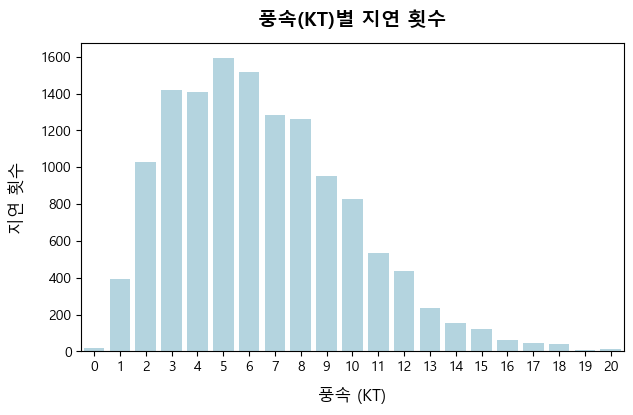

In [459]:
# 풍속별 지연 횟수
windspeed_counts = depart_delay['풍속(KT)'].value_counts().sort_index()

# 시각화 
plt.figure(figsize=(7, 4))
sns.barplot(x = windspeed_counts.index, y = windspeed_counts.values, color = 'lightblue', legend = False)

# 그래프 제목 및 라벨 설정
plt.title('풍속(KT)별 지연 횟수', fontweight = 'bold', fontsize = 14, pad = 13)
plt.xlabel('풍속 (KT)', fontsize = 12, labelpad = 10)
plt.ylabel('지연 횟수', fontsize = 12, labelpad = 10)

# 그래프 확인인
plt.show()

[ 기온(°C)별 지연 횟수 ]

c:\Users\KDP38\anaconda3\envs\PY39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


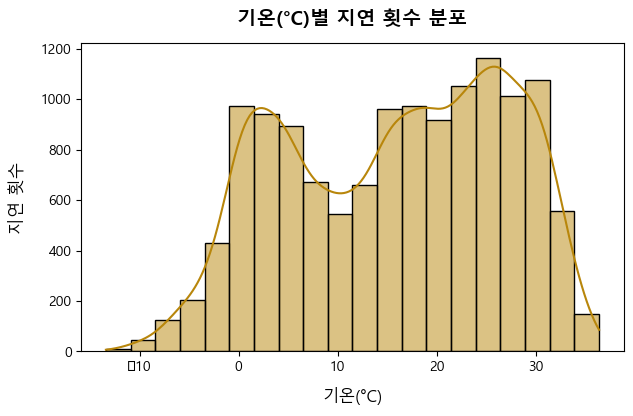

In [460]:
# 시각화
plt.figure(figsize = (7, 4))
sns.histplot(depart_delay['기온(°C)'], bins = 20, kde = True, color = 'darkgoldenrod')

# 그래프 제목 및 축 라벨 설정
plt.title('기온(°C)별 지연 횟수 분포', fontweight = 'bold', fontsize = 14, pad = 13)
plt.xlabel('기온(°C)', fontsize = 12, labelpad = 10)
plt.ylabel('지연 횟수', fontsize = 12, labelpad = 10)

# 그래프 확인
plt.show()

[ 현지기압(hPa)별 지연 횟수]

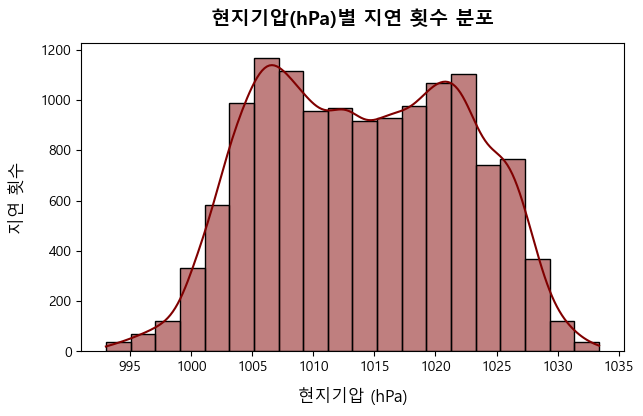

In [461]:
# 시각화
plt.figure(figsize=(7, 4))
sns.histplot(depart_delay['현지기압(hPa)'], bins = 20, kde = True, color = 'maroon')

# 그래프 제목 및 축 라벨 설정
plt.title('현지기압(hPa)별 지연 횟수 분포', fontweight = 'bold', fontsize = 14, pad = 13)
plt.xlabel('현지기압 (hPa)', fontsize = 12, labelpad = 10)
plt.ylabel('지연 횟수', fontsize = 12, labelpad = 10)

# 그래프 확인
plt.show()

[ 강수량(mm)별 지원 횟수]

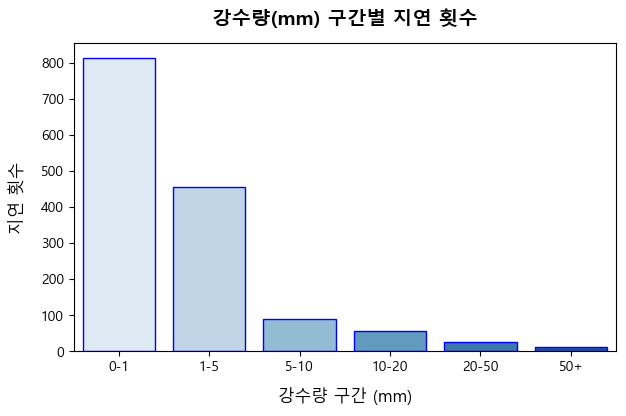

In [462]:
# 강수량 구간화
depart_delay = depart_delay.copy()  # 원본 데이터 보호
depart_delay.loc[:, '강수량(mm) 구간'] = pd.cut(depart_delay['강수량(mm)'],
                                               bins=[0, 1, 5, 10, 20, 50, 100],
                                               labels=['0-1', '1-5', '5-10', '10-20', '20-50', '50+'])

# 강수량 구간별 지연 횟수
rainfall_bins_counts = depart_delay['강수량(mm) 구간'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(7, 4))
sns.barplot(x = rainfall_bins_counts.index,
            y = rainfall_bins_counts.values,
            hue = rainfall_bins_counts.index,  
            palette = 'Blues',
            edgecolor='blue',
            legend = False)

# 그래프 제목 및 축 라벨 설정
plt.title('강수량(mm) 구간별 지연 횟수', fontweight = 'bold', fontsize = 14, pad = 13)
plt.xlabel('강수량 구간 (mm)', fontsize = 12, labelpad = 10)
plt.ylabel('지연 횟수', fontsize = 12, labelpad = 10)

# 그래프 확인
plt.show()

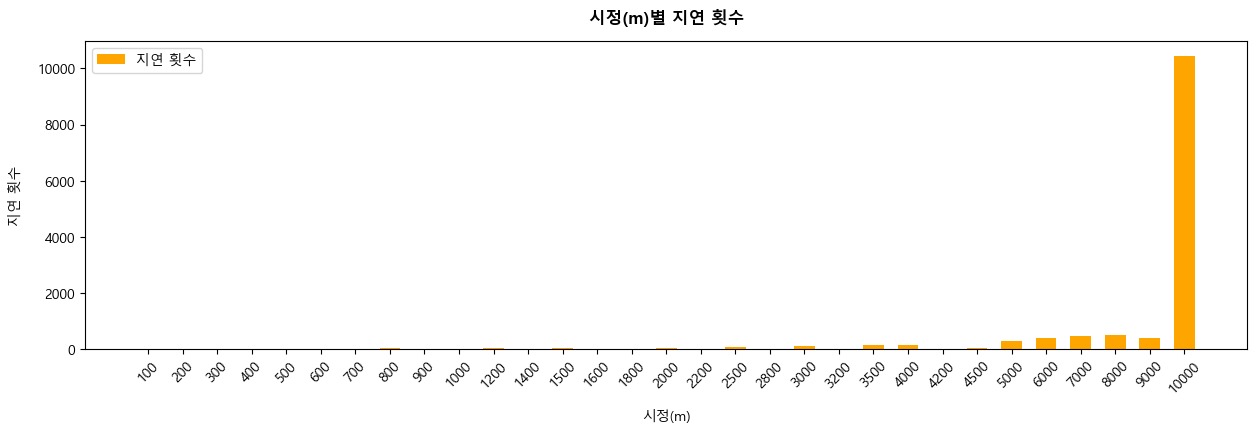

In [474]:
# 시정(m)별 지연 횟수
delay_counts_by_visibility = depart_delay["시정(m)"].value_counts().sort_index()

# 시각화
plt.figure(figsize = (15, 4))
plt.bar(delay_counts_by_visibility.index.astype(str), delay_counts_by_visibility.values, width = 0.6, color = 'orange', label = "지연 횟수")

# 그래프 제목 및 축 라벨 설정
plt.xlabel("시정(m)", labelpad = 10)
plt.ylabel("지연 횟수", labelpad = 10)
plt.title("시정(m)별 지연 횟수", pad = 13, fontweight = 'bold')
plt.xticks(rotation = 45)
plt.legend()

# 그래프 출력
plt.show()


 각 기상상황별 지연률 계산 및 그래프  <hr>

[ 비행횟수 고려한 풍속별 지연률 ]

In [464]:
# 풍속별 전체 비행 횟수
total_flights = merged_DF['풍속(KT)'].value_counts().sort_index()

# 풍속별 지연된 비행 횟수
delayed_flights = merged_DF[merged_DF['현황'] == '지연']['풍속(KT)'].value_counts().sort_index()

# 지연률 계산 (%)
delay_rate = (delayed_flights / total_flights * 100).fillna(0)

# 결과를 DataFrame으로 정리
wind_speed_delay_df = pd.DataFrame({'풍속(KT)': delay_rate.index,
                                    '지연률(%)': delay_rate.values})

# 확인
print(wind_speed_delay_df)

    풍속(KT)     지연률(%)
0        0  10.897436
1        1  11.741858
2        2  14.860368
3        3  17.783635
4        4  18.896478
5        5  21.863848
6        6  22.251539
7        7  21.060407
8        8  22.612435
9        9  23.352120
10      10  24.599407
11      11  23.835125
12      12  27.347196
13      13  23.219512
14      14  24.451411
15      15  34.733894
16      16  24.137931
17      17  26.011561
18      18  44.318182
19      19  35.714286
20      20  43.750000


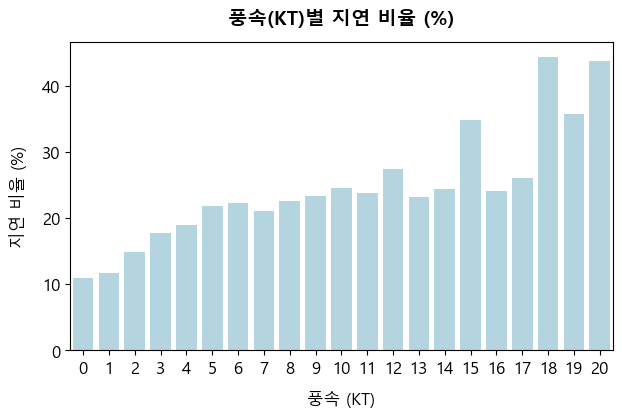

In [465]:
# 시각화
plt.figure(figsize = (7, 4))
sns.barplot(data = wind_speed_delay_df, x = '풍속(KT)', y = '지연률(%)', color = 'lightblue', legend = False)

# 제목 및 축 라벨 설정
plt.title('풍속(KT)별 지연 비율 (%)', fontsize = 14, fontweight = 'bold', pad = 13)
plt.xlabel('풍속 (KT)', fontsize = 12, labelpad = 10)
plt.ylabel('지연 비율 (%)', fontsize = 12, labelpad = 10)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

# 그래프 확인
plt.show()

[ 비행횟수 고려한 기온(°C)별 지연률 ]

In [466]:
# 기온을 5°C 간격으로 구간화하고 지연률 계산
merged_DF['기온 구간'] = pd.cut(merged_DF['기온(°C)'], bins = range(-15, 40, 5), right = False)
temperature_delay_df = (merged_DF.groupby('기온 구간', observed=False)['현황']  # observed=False 추가
                       .apply(lambda x: (x.eq('지연').sum() / x.count()) * 100)
                       .dropna()
                       .reset_index(name = '지연률(%)'))

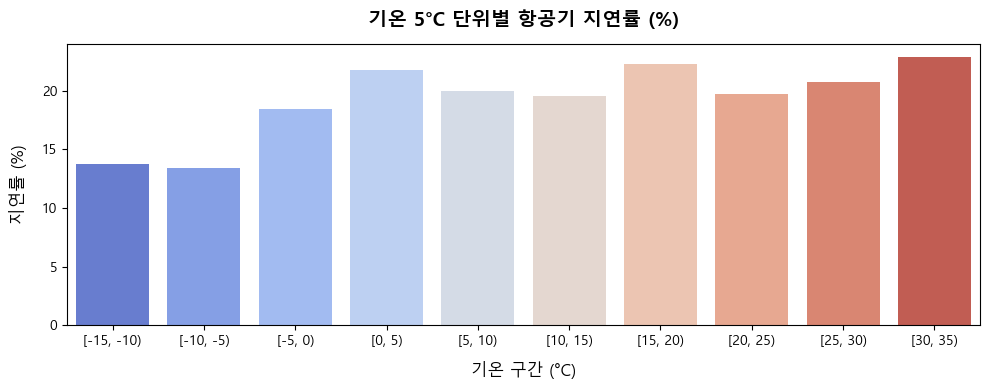

In [467]:
# 시각화
plt.figure(figsize=(10, 4))
sns.barplot(data = temperature_delay_df, x = '기온 구간', y = '지연률(%)', hue = '기온 구간', palette = 'coolwarm', dodge = False)

# 제목 및 축 라벨 설정
plt.title('기온 5°C 단위별 항공기 지연률 (%)', fontsize = 14, fontweight = 'bold', pad = 13)
plt.xlabel('기온 구간 (°C)', fontsize = 12, labelpad = 10)
plt.ylabel('지연률 (%)', fontsize = 12, labelpad = 10)

# 범례 제거
plt.legend([], [], frameon = False)

plt.tight_layout()

# 그래프 확인
plt.show()

[ 비행횟수 고려한 현지기압(hPa)별 지연률 ]

In [468]:

# 기압을 5hPa 단위로 나누고 지연률 계산
merged_DF['기압 구간'] = pd.cut(merged_DF['현지기압(hPa)'], bins=range(int(merged_DF['현지기압(hPa)'].min()), int(merged_DF['현지기압(hPa)'].max()) + 5, 5))

# 전체 비행 횟수 및 지연된 비행 횟수
total_flights = merged_DF['기압 구간'].value_counts()
delayed_flights = merged_DF[merged_DF['현황'] == '지연']['기압 구간'].value_counts()

# 지연률 계산
pressure_delay_df = (delayed_flights / total_flights * 100).dropna().reset_index()
pressure_delay_df.columns = ['기압 구간', '지연률(%)']

# 결과 확인
pressure_delay_df


          기압 구간     지연률(%)
0    (992, 997]  26.250000
1   (997, 1002]  22.752613
2  (1002, 1007]  21.166454
3  (1007, 1012]  21.512576
4  (1012, 1017]  18.375635
5  (1017, 1022]  20.159507
6  (1022, 1027]  20.597515
7  (1027, 1032]  18.739955
8  (1032, 1037]  25.862069


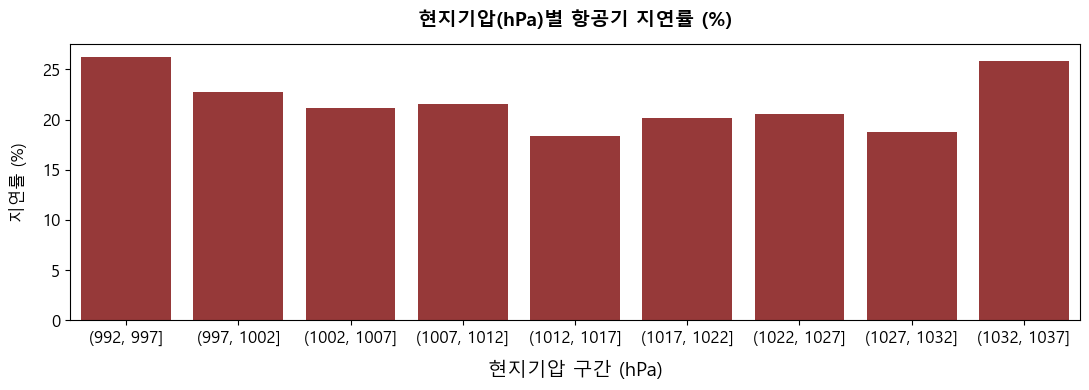

In [469]:
# 시각화
plt.figure(figsize = (11,4))
sns.barplot(data = pressure_delay_df,
    x = '기압 구간',
    y = '지연률(%)',
    hue = None,  # Seaborn 0.14.0 이상에서는 명시적으로 설정해야 경고가 사라짐
    color = 'brown')

# 그래프 제목 및 라벨 설정
plt.title('현지기압(hPa)별 항공기 지연률 (%)', fontsize = 14, fontweight = 'bold', pad = 13)
plt.xlabel('현지기압 구간 (hPa)', fontsize = 14, labelpad = 10)
plt.ylabel('지연률 (%)', fontsize = 12, labelpad = 10)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.tight_layout()

# 그래프 확인
plt.show()

[ 비행횟수 고려한 강수량(mm) 지연률 ]

In [470]:
# 강수량을 구간별로 나누기 (0mm, 1~5mm, 5~10mm, 10~20mm, 20~50mm, 50mm 이상)
bins = [0, 1, 5, 10, 20, 50, float('inf')]
labels = ['0mm', '1~5mm', '5~10mm', '10~20mm', '20~50mm', '50mm 이상']
merged_DF['강수량 구간'] = pd.cut(merged_DF['강수량(mm)'], bins = bins, labels = labels, right = False)

# 전체 비행 횟수 및 지연된 비행 횟수
total_flights = merged_DF.groupby('강수량 구간', observed = False)['현황'].count()
delayed_flights = merged_DF[merged_DF['현황'] == '지연'].groupby('강수량 구간', observed=False)['현황'].count()

# 지연률 계산 (없는 값 제외)
rainfall_delay_df = (delayed_flights / total_flights * 100).dropna().reset_index()
rainfall_delay_df.columns = ['강수량 구간', '지연률(%)']

# 결과 확인
rainfall_delay_df

    강수량 구간     지연률(%)
0      0mm  20.158818
1    1~5mm  33.014354
2   5~10mm  40.271493
3  10~20mm  34.545455
4  20~50mm  31.645570
5  50mm 이상  73.333333


C:\Users\KDP38\AppData\Local\Temp\ipykernel_14696\3160241697.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


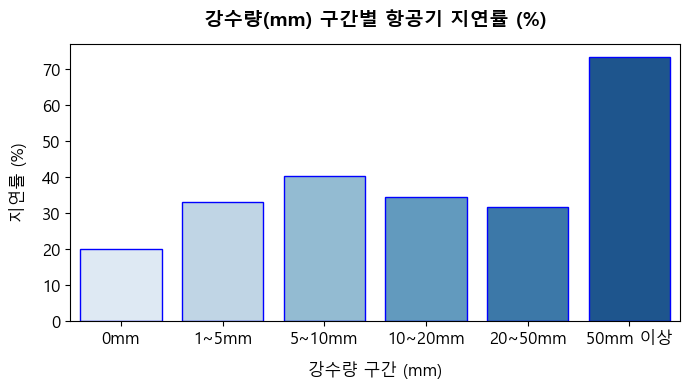

In [471]:
# 강수량 구간이 존재하지 않으면 다시 생성
if '강수량 구간' not in merged_DF.columns:
    merged_DF['강수량 구간'] = pd.cut(
        merged_DF['강수량(mm)'],
        bins = [0, 1, 5, 10, 20, 50, float('inf')],
        labels = ['0mm', '1~5mm', '5~10mm', '10~20mm', '20~50mm', '50mm 이상'],
        right = False)

rainfall_delay_df = merged_DF.groupby('강수량 구간', observed=False)['현황'].apply(
    lambda x: (x.eq('지연').sum() / x.count()) * 100).dropna().reset_index()

rainfall_delay_df.columns = ['강수량 구간', '지연률(%)']

# 시각화 
plt.figure(figsize = (7, 4))
sns.barplot(
    data = rainfall_delay_df, 
    x = '강수량 구간', 
    y = '지연률(%)', 
    hue = None,  # Seaborn 0.14.0 경고 해결
    palette = 'Blues', 
    edgecolor = 'blue')

# 그래프 제목 및 라벨 설정
plt.title('강수량(mm) 구간별 항공기 지연률 (%)', fontsize = 14, fontweight = 'bold', pad = 13)
plt.xlabel('강수량 구간 (mm)', fontsize = 12, labelpad = 10)
plt.ylabel('지연률 (%)', fontsize = 12, labelpad = 10)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.tight_layout()

# 그래프 확인
plt.show()

[ 비행횟수 고려한 시정(m)별 지연률 ]

In [472]:
# 시정(m)별 전체 비행 횟수 
total_flights_by_visibility = merged_DF["시정(m)"].value_counts().sort_index()

# 시정(m)별 지연된 비행 횟수 
delayed_flights_by_visibility = depart_delay["시정(m)"].value_counts().sort_index()

# 비행 횟수를 고려한 시정(m)별 지연률 계산 (지연 횟수 / 전체 비행 횟수) * 100
delay_rate_by_visibility = (delayed_flights_by_visibility / total_flights_by_visibility * 100).fillna(0)


# 지연률 확인
delay_rate_by_visibility

시정(m)
100      20.689655
200       1.923077
300      52.272727
400      26.923077
500      11.111111
600      15.384615
700      21.739130
800      45.544554
900      83.333333
1000     48.148148
1200     61.842105
1400      7.142857
1500     20.657277
1600     13.793103
1800     22.857143
2000     18.800000
2200      9.333333
2500     20.984456
2800      7.142857
3000     22.289157
3200     17.391304
3500     22.740964
4000     16.911765
4200      8.333333
4500     14.432990
5000     16.875000
6000     21.655024
7000     20.474517
8000     22.291297
9000     21.084643
10000    20.274047
Name: count, dtype: float64

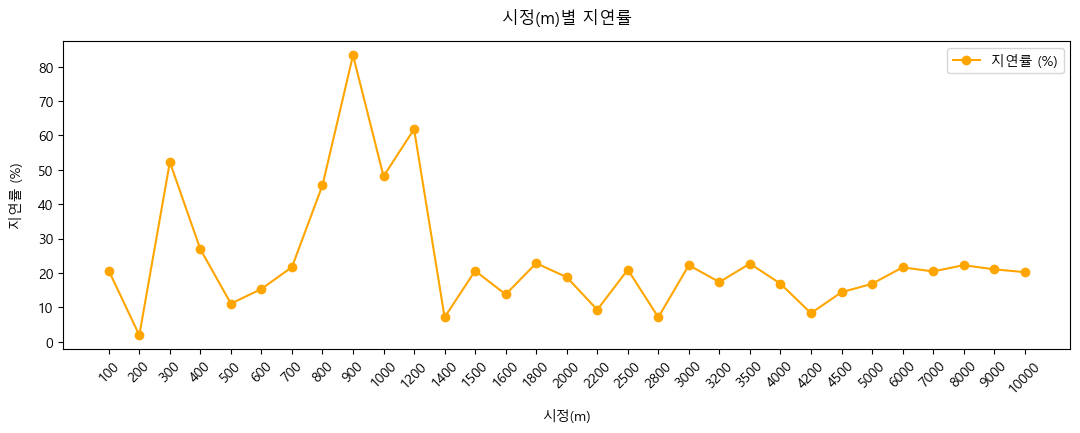

In [473]:
# 시각화
plt.figure(figsize = (13, 4))
plt.plot(delay_rate_by_visibility.index.astype(str), delay_rate_by_visibility.values, marker = "o", linestyle = "-", color = "orange", label = "지연률 (%)")

# 그래프 제목 및 축 라벨 설정
plt.xlabel("시정(m)", labelpad = 10)
plt.ylabel("지연률 (%)", labelpad = 10)
plt.title("시정(m)별 지연률", pad = 13)
plt.xticks(rotation=45)
plt.legend()

# 그래프 확인
plt.show()
